In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.1 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.7 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 31.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.8 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall:

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("alicer5/currencydataset")

print("Path to dataset files:", path)
path = f'{path}/currencydataset'

Path to dataset files: /kaggle/input/currencydataset


In [5]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
import os
import shutil

# Define your dataset root and the target directory for the val folder
dataset_root = "/kaggle/input/currencydataset/CurrencyDataset"
val_folder_path = os.path.join(dataset_root, 'val')
colab_content_root = "/kaggle/working/val"
destination_val_path = os.path.join(colab_content_root,'train')

print(f"Attempting to copy '{val_folder_path}' to '{val_folder_path}'...")

# 1. Copy the 'val' folder to /content/
try:
    shutil.copytree( os.path.join(dataset_root, 'train'),  os.path.join(colab_content_root, 'train'), dirs_exist_ok=True)
    print(f"Copied '{val_folder_path}' to 'train'")
    shutil.copytree( os.path.join(dataset_root, 'test'),  os.path.join(colab_content_root, 'test'), dirs_exist_ok=True)
    print(f"Copied '{val_folder_path}' to 'test'")
    # print(f"Successfully copied '{val_folder_path}' to '{colab_content_root}'")
except FileExistsError:
    print(f"Warning: Destination '{destination_val_path}' already exists. Skipping copy.")
    print("If you want to overwrite, you might need to delete the existing /content/val first.")
except FileNotFoundError:
    print(f"Error: Source '{val_folder_path}' not found. Make sure the path is correct.")
except Exception as e:
    print(f"An unexpected error occurred during copy: {e}")

# print(f"\nAttempting to delete '{val_folder_path}' from original location...")

# # 2. Delete the 'val' folder from the original dataset_root
# try:
#     if os.path.exists(val_folder_path):
#         shutil.rmtree(val_folder_path)
#         print(f"Successfully deleted '{val_folder_path}'")
#     else:
#         print(f"Warning: '{val_folder_path}' does not exist, so nothing to delete.")
# except Exception as e:
#     print(f"An error occurred during deletion: {e}")

# # Verify the presence in /content/ and absence from original location
# print("\nVerification:")
# print(f"Does /content/val exist? {os.path.exists(destination_val_path)}")
# print(f"Does {val_folder_path} exist? {os.path.exists(val_folder_path)}")

Attempting to copy '/kaggle/input/currencydataset/CurrencyDataset/val' to '/kaggle/input/currencydataset/CurrencyDataset/val'...
Copied '/kaggle/input/currencydataset/CurrencyDataset/val' to 'train'
Copied '/kaggle/input/currencydataset/CurrencyDataset/val' to 'test'


In [8]:
CV_IMAGE_SIZE = 640
BATCH_SIZE = 64
EPOCHS = 20
model_name='yolo11n-cls.pt'

In [9]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n-cls.pt")  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data=f"{colab_content_root}", epochs=100, imgsz=640,  batch=32)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Ultralytics 8.3.173 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/val, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=Tru

AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3231.9±1002.5 MB/s, size: 410.6 KB)


train: Scanning /kaggle/working/val/train... 500 images, 0 corrupt: 100%|██████████| 500/500 [00:00<00:00, 2432.53it/s]

train: New cache created: /kaggle/working/val/train.cache


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1747.4±1403.2 MB/s, size: 331.0 KB)


val: Scanning /kaggle/working/val/test... 196 images, 0 corrupt: 100%|██████████| 196/196 [00:00<00:00, 2693.43it/s]

val: New cache created: /kaggle/working/val/test.cache


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/classify/train
Starting training for 100 epochs...

      Epoch    GPU_mem       loss  Instances       Size


      1/100      3.33G      0.681         32        640:  19%|█▉        | 3/16 [00:06<00:19,  1.51s/it]
      1/100      3.35G       0.58         20        640: 100%|██████████| 16/16 [00:16<00:00,  1.01s/it]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00,  8.59it/s]

                   all      0.867          1



      Epoch    GPU_mem       loss  Instances       Size


      2/100      4.14G     0.2156         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.14it/s]

                   all      0.923          1



      Epoch    GPU_mem       loss  Instances       Size


      3/100      4.15G     0.1716         20        640: 100%|██████████| 16/16 [00:14<00:00,  1.09it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.31it/s]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


      4/100      4.16G     0.1873         20        640: 100%|██████████| 16/16 [00:14<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 12.00it/s]

                   all      0.959          1



      Epoch    GPU_mem       loss  Instances       Size


      5/100      4.17G     0.1494         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.35it/s]

                   all      0.934          1



      Epoch    GPU_mem       loss  Instances       Size


      6/100      4.18G     0.1528         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.90it/s]

                   all      0.918          1



      Epoch    GPU_mem       loss  Instances       Size


      7/100      4.19G     0.1823         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.46it/s]

                   all      0.801          1



      Epoch    GPU_mem       loss  Instances       Size


      8/100       4.2G     0.1876         20        640: 100%|██████████| 16/16 [00:12<00:00,  1.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.63it/s]

                   all      0.852          1



      Epoch    GPU_mem       loss  Instances       Size


      9/100       4.2G     0.2363         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.28it/s]

                   all      0.505          1



      Epoch    GPU_mem       loss  Instances       Size


     10/100      4.21G     0.2135         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.76it/s]

                   all      0.888          1



      Epoch    GPU_mem       loss  Instances       Size


     11/100      4.22G     0.1702         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 12.09it/s]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


     12/100      4.23G     0.1655         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 12.01it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     13/100      4.24G     0.1671         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.50it/s]

                   all       0.76          1



      Epoch    GPU_mem       loss  Instances       Size


     14/100      4.25G     0.1977         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.82it/s]

                   all      0.857          1



      Epoch    GPU_mem       loss  Instances       Size


     15/100      4.26G     0.1442         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.31it/s]

                   all      0.934          1



      Epoch    GPU_mem       loss  Instances       Size


     16/100      4.27G     0.1154         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.00it/s]

                   all      0.862          1



      Epoch    GPU_mem       loss  Instances       Size


     17/100      4.27G     0.1099         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.38it/s]

                   all      0.908          1



      Epoch    GPU_mem       loss  Instances       Size


     18/100      4.28G    0.09175         20        640: 100%|██████████| 16/16 [00:12<00:00,  1.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.75it/s]

                   all      0.934          1



      Epoch    GPU_mem       loss  Instances       Size


     19/100      4.29G     0.1057         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.74it/s]

                   all      0.821          1



      Epoch    GPU_mem       loss  Instances       Size


     20/100       4.3G    0.09873         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.88it/s]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


     21/100      4.31G    0.07727         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.82it/s]

                   all      0.954          1



      Epoch    GPU_mem       loss  Instances       Size


     22/100      4.32G    0.08542         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.18it/s]

                   all      0.934          1



      Epoch    GPU_mem       loss  Instances       Size


     23/100      4.33G    0.07975         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 10.75it/s]

                   all      0.949          1



      Epoch    GPU_mem       loss  Instances       Size


     24/100      4.33G     0.1041         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.26it/s]

                   all      0.878          1



      Epoch    GPU_mem       loss  Instances       Size


     25/100      4.34G     0.1203         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 12.04it/s]

                   all      0.934          1



      Epoch    GPU_mem       loss  Instances       Size


     26/100      4.35G     0.0945         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 12.06it/s]

                   all      0.954          1



      Epoch    GPU_mem       loss  Instances       Size


     27/100      4.36G    0.09272         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.42it/s]

                   all      0.974          1



      Epoch    GPU_mem       loss  Instances       Size


     28/100      4.37G    0.07473         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.83it/s]

                   all      0.903          1



      Epoch    GPU_mem       loss  Instances       Size


     29/100      4.38G     0.1272         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.85it/s]

                   all      0.985          1



      Epoch    GPU_mem       loss  Instances       Size


     30/100      4.39G     0.1031         20        640: 100%|██████████| 16/16 [00:12<00:00,  1.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.95it/s]

                   all      0.862          1



      Epoch    GPU_mem       loss  Instances       Size


     31/100      4.39G      0.136         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.77it/s]

                   all      0.852          1



      Epoch    GPU_mem       loss  Instances       Size


     32/100       4.4G     0.1074         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.91it/s]

                   all      0.929          1



      Epoch    GPU_mem       loss  Instances       Size


     33/100      4.41G    0.08159         20        640: 100%|██████████| 16/16 [00:12<00:00,  1.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.59it/s]

                   all      0.969          1



      Epoch    GPU_mem       loss  Instances       Size


     34/100      4.42G    0.05808         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.19it/s]

                   all      0.974          1



      Epoch    GPU_mem       loss  Instances       Size


     35/100      4.43G    0.05595         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.79it/s]

                   all      0.974          1



      Epoch    GPU_mem       loss  Instances       Size


     36/100      4.44G    0.07284         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.82it/s]

                   all      0.969          1



      Epoch    GPU_mem       loss  Instances       Size


     37/100      4.45G    0.05554         20        640: 100%|██████████| 16/16 [00:12<00:00,  1.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.29it/s]

                   all      0.949          1



      Epoch    GPU_mem       loss  Instances       Size


     38/100      4.46G    0.05254         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.10it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     39/100      4.46G    0.05396         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.92it/s]

                   all      0.969          1



      Epoch    GPU_mem       loss  Instances       Size


     40/100      4.47G    0.05408         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.81it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


     41/100      4.48G    0.05498         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.98it/s]

                   all      0.954          1



      Epoch    GPU_mem       loss  Instances       Size


     42/100      4.49G    0.06201         20        640: 100%|██████████| 16/16 [00:12<00:00,  1.28it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.19it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     43/100       4.5G    0.04682         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.03it/s]

                   all      0.969          1



      Epoch    GPU_mem       loss  Instances       Size


     44/100      4.51G    0.06735         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.63it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     45/100      4.52G      0.109         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.39it/s]

                   all      0.969          1



      Epoch    GPU_mem       loss  Instances       Size


     46/100      4.53G    0.05532         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.15it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.57it/s]

                   all      0.929          1



      Epoch    GPU_mem       loss  Instances       Size


     47/100      4.54G    0.06694         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.38it/s]

                   all      0.934          1



      Epoch    GPU_mem       loss  Instances       Size


     48/100      4.54G    0.06788         20        640: 100%|██████████| 16/16 [00:12<00:00,  1.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.97it/s]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


     49/100      4.55G    0.05485         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.93it/s]

                   all      0.929          1



      Epoch    GPU_mem       loss  Instances       Size


     50/100      4.56G    0.04815         20        640: 100%|██████████| 16/16 [00:14<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.14it/s]

                   all      0.974          1



      Epoch    GPU_mem       loss  Instances       Size


     51/100      4.57G    0.04323         20        640: 100%|██████████| 16/16 [00:12<00:00,  1.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.40it/s]

                   all      0.974          1



      Epoch    GPU_mem       loss  Instances       Size


     52/100      4.58G    0.04406         20        640: 100%|██████████| 16/16 [00:14<00:00,  1.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.96it/s]

                   all      0.959          1



      Epoch    GPU_mem       loss  Instances       Size


     53/100      4.59G    0.05808         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.85it/s]

                   all      0.959          1



      Epoch    GPU_mem       loss  Instances       Size


     54/100       4.6G    0.04468         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.32it/s]

                   all      0.959          1



      Epoch    GPU_mem       loss  Instances       Size


     55/100       4.6G    0.04593         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.56it/s]

                   all      0.959          1



      Epoch    GPU_mem       loss  Instances       Size


     56/100      4.61G    0.03943         20        640: 100%|██████████| 16/16 [00:12<00:00,  1.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.80it/s]

                   all      0.934          1



      Epoch    GPU_mem       loss  Instances       Size


     57/100      4.62G    0.04035         20        640: 100%|██████████| 16/16 [00:12<00:00,  1.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.18it/s]

                   all      0.934          1



      Epoch    GPU_mem       loss  Instances       Size


     58/100      4.63G    0.05012         20        640: 100%|██████████| 16/16 [00:14<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.65it/s]

                   all      0.939          1



      Epoch    GPU_mem       loss  Instances       Size


     59/100      4.64G    0.03552         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.39it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


     60/100      4.65G    0.06151         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.34it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


     61/100      4.66G     0.0389         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.55it/s]

                   all      0.959          1



      Epoch    GPU_mem       loss  Instances       Size


     62/100      4.66G    0.03553         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.18it/s]

                   all      0.969          1



      Epoch    GPU_mem       loss  Instances       Size


     63/100      4.67G    0.05457         20        640: 100%|██████████| 16/16 [00:12<00:00,  1.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.21it/s]

                   all      0.949          1



      Epoch    GPU_mem       loss  Instances       Size


     64/100      4.68G    0.05468         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.14it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.76it/s]

                   all      0.929          1



      Epoch    GPU_mem       loss  Instances       Size


     65/100      4.69G     0.0441         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.60it/s]

                   all      0.944          1



      Epoch    GPU_mem       loss  Instances       Size


     66/100       4.7G    0.05395         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.81it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


     67/100      4.71G    0.05105         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.23it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.39it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


     68/100      4.72G    0.03962         20        640: 100%|██████████| 16/16 [00:12<00:00,  1.24it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.34it/s]

                   all      0.959          1



      Epoch    GPU_mem       loss  Instances       Size


     69/100      4.73G    0.05184         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.72it/s]

                   all      0.949          1



      Epoch    GPU_mem       loss  Instances       Size


     70/100      4.73G    0.03583         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.41it/s]

                   all      0.929          1



      Epoch    GPU_mem       loss  Instances       Size


     71/100      4.74G    0.04271         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.21it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


     72/100      4.75G    0.03615         20        640: 100%|██████████| 16/16 [00:12<00:00,  1.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.66it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


     73/100      4.76G    0.03077         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.80it/s]

                   all      0.954          1



      Epoch    GPU_mem       loss  Instances       Size


     74/100      4.77G    0.03779         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.34it/s]

                   all      0.959          1



      Epoch    GPU_mem       loss  Instances       Size


     75/100      4.78G    0.02529         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.84it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


     76/100      4.79G    0.03795         20        640: 100%|██████████| 16/16 [00:12<00:00,  1.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.83it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


     77/100      4.79G    0.03307         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.59it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


     78/100       4.8G     0.0333         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.17it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.88it/s]

                   all      0.959          1



      Epoch    GPU_mem       loss  Instances       Size


     79/100      4.81G    0.02567         20        640: 100%|██████████| 16/16 [00:12<00:00,  1.27it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.36it/s]

                   all      0.954          1



      Epoch    GPU_mem       loss  Instances       Size


     80/100      4.82G    0.02671         20        640: 100%|██████████| 16/16 [00:12<00:00,  1.25it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.55it/s]

                   all      0.969          1



      Epoch    GPU_mem       loss  Instances       Size


     81/100      4.83G    0.03188         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.21it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.68it/s]

                   all      0.954          1



      Epoch    GPU_mem       loss  Instances       Size


     82/100      4.84G    0.02321         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.22it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


     83/100      4.85G    0.02179         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.03it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


     84/100      4.86G    0.04415         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.20it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.98it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


     85/100      4.87G    0.03539         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.19it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.62it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


     86/100      4.87G      0.018         20        640: 100%|██████████| 16/16 [00:12<00:00,  1.26it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.12it/s]

                   all      0.954          1



      Epoch    GPU_mem       loss  Instances       Size


     87/100      4.88G    0.02289         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.18it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.76it/s]

                   all      0.959          1



      Epoch    GPU_mem       loss  Instances       Size


     88/100      4.89G    0.02654         20        640: 100%|██████████| 16/16 [00:14<00:00,  1.12it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.87it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


     89/100       4.9G     0.0301         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.22it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.41it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


     90/100      4.91G    0.03411         20        640: 100%|██████████| 16/16 [00:13<00:00,  1.16it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.26it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


     91/100      4.92G    0.02232         20        640: 100%|██████████| 16/16 [00:14<00:00,  1.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.83it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


     92/100      4.93G    0.02895         20        640: 100%|██████████| 16/16 [00:15<00:00,  1.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.93it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


     93/100      4.94G    0.02546         20        640: 100%|██████████| 16/16 [00:14<00:00,  1.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 12.03it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


     94/100      4.94G    0.02312         20        640: 100%|██████████| 16/16 [00:15<00:00,  1.04it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 12.09it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


     95/100      4.95G    0.02212         20        640: 100%|██████████| 16/16 [00:14<00:00,  1.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 10.89it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


     96/100      4.96G     0.0234         20        640: 100%|██████████| 16/16 [00:14<00:00,  1.13it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.81it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


     97/100      4.97G    0.02088         20        640: 100%|██████████| 16/16 [00:15<00:00,  1.06it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.67it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


     98/100      4.98G    0.02535         20        640: 100%|██████████| 16/16 [00:14<00:00,  1.11it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.19it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


     99/100      4.99G    0.02228         20        640: 100%|██████████| 16/16 [00:15<00:00,  1.05it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.27it/s]

                   all      0.964          1



      Epoch    GPU_mem       loss  Instances       Size


    100/100         5G    0.03231         20        640: 100%|██████████| 16/16 [00:14<00:00,  1.08it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:00<00:00, 11.11it/s]

                   all      0.964          1



100 epochs completed in 0.395 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.2MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.2MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.173 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-cls summary (fused): 47 layers, 1,528,586 parameters, 0 gradients, 3.2 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /kaggle/working/val/train... found 500 images in 2 classes ✅ 
val: /kaggle/working/val/test... found 196 images in 2 classes ✅ 
test: /kaggle/working/val/test... found 196 images in 2 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 4/4 [00:05<00:00,  1.41s/it]


                   all       0.98          1
Speed: 0.5ms preprocess, 1.6ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


In [10]:
# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.top1  # top1 accuracy
metrics.top5  # top5 accuracy

Ultralytics 8.3.173 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n-cls summary (fused): 47 layers, 1,528,586 parameters, 0 gradients, 3.2 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /kaggle/working/val/train... found 500 images in 2 classes ✅ 
val: /kaggle/working/val/test... found 196 images in 2 classes ✅ 
test: /kaggle/working/val/test... found 196 images in 2 classes ✅ 
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1748.8±1386.8 MB/s, size: 331.0 KB)


val: Scanning /kaggle/working/val/test... 196 images, 0 corrupt: 100%|██████████| 196/196 [00:00<?, ?it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 7/7 [00:05<00:00,  1.29it/s]


                   all      0.985          1
Speed: 4.1ms preprocess, 3.9ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train2


1.0


image 1/1 /kaggle/input/currencydataset/CurrencyDataset/val/IndianCurrency-Fake-1.png: 640x640 Real 0.86, Fake 0.14, 5.3ms
Speed: 40.4ms preprocess, 5.3ms inference, 0.1ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/input/currencydataset/CurrencyDataset/val/IndianCurrency-Fake-2.jpg: 640x640 Fake 0.99, Real 0.01, 6.1ms
Speed: 12.7ms preprocess, 6.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/input/currencydataset/CurrencyDataset/val/IndianCurrency-Real-1.jpg: 640x640 Real 1.00, Fake 0.00, 4.4ms
Speed: 11.8ms preprocess, 4.4ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/input/currencydataset/CurrencyDataset/val/IndianCurrency-Real-2.jpg: 640x640 Real 1.00, Fake 0.00, 4.5ms
Speed: 13.1ms preprocess, 4.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 640)


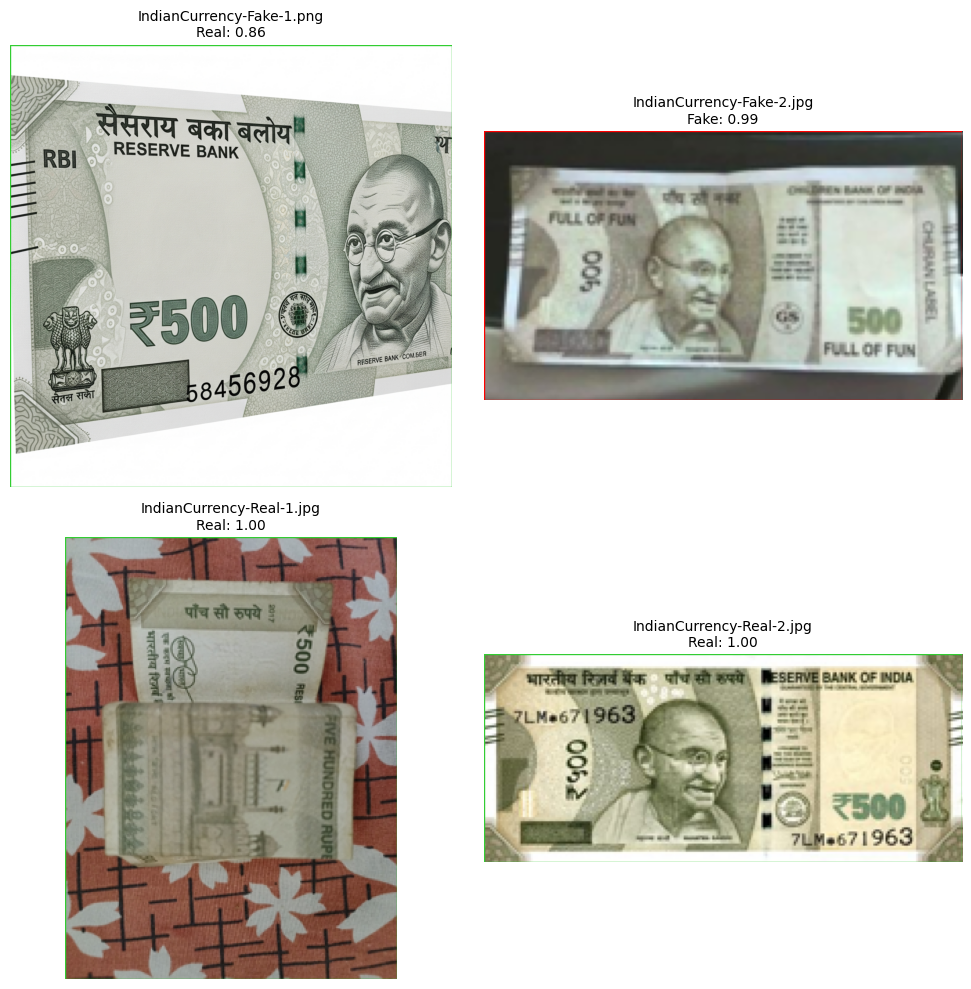

In [16]:
import os
from ultralytics import YOLO
import matplotlib.pyplot as plt
from PIL import Image

# Load your trained classification model
model = YOLO("/kaggle/working/runs/classify/train/weights/best.pt")
class_names = model.names
from matplotlib import patches
from PIL import Image
# Path to directory containing test images
image_directory = "/kaggle/input/currencydataset/CurrencyDataset/val" # Set your image directory here

# Get image files
image_files = [f for f in os.listdir(image_directory) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
image_files.sort()
import numpy as np
# Set up grid
num_images = len(image_files)
num_cols = 2
num_rows = (num_images + 1) // 2

plt.figure(figsize=(10, 5 * num_rows))

for idx, image_file in enumerate(image_files):
    image_path = os.path.join(image_directory, image_file)
    results = model(image_path)
    result = results[0]

    # Get top-1 prediction
    top1_class = result.probs.top1
    confidence = result.probs.data[top1_class].item()
    class_name = class_names[top1_class]

    img = Image.open(image_path)
    new_size = (img.width // 2, img.height // 2)
    img = img.resize(new_size)
    img_np = np.array(img)

    # Plot
    ax = plt.subplot(num_rows, num_cols, idx + 1)
    ax.imshow(img_np)
    ax.axis('off')
    ax.set_title(f"{image_file}\n{class_name}: {confidence:.2f}", fontsize=10)

    # Draw rectangle border around image
    rect = patches.Rectangle(
        (0, 0), 1, 1,
        transform=ax.transAxes,  # Use axes coordinates (0 to 1)
        linewidth=1,
        edgecolor='limegreen' if class_name == "Real" else 'red',
        facecolor='none'
    )
    ax.add_patch(rect)

plt.tight_layout()
plt.show()

In [15]:
# # Compress the output directory
!zip -r /kaggle/working/currency-yolo11-cls.zip /kaggle/working/runs

updating: kaggle/working/runs/ (stored 0%)
updating: kaggle/working/runs/classify/ (stored 0%)
updating: kaggle/working/runs/classify/train2/ (stored 0%)
updating: kaggle/working/runs/classify/train2/val_batch0_pred.jpg (deflated 1%)
updating: kaggle/working/runs/classify/train2/val_batch2_pred.jpg (deflated 1%)
updating: kaggle/working/runs/classify/train2/confusion_matrix.png (deflated 37%)
updating: kaggle/working/runs/classify/train2/val_batch1_pred.jpg (deflated 1%)
updating: kaggle/working/runs/classify/train2/val_batch0_labels.jpg (deflated 1%)
updating: kaggle/working/runs/classify/train2/val_batch2_labels.jpg (deflated 1%)
updating: kaggle/working/runs/classify/train2/val_batch1_labels.jpg (deflated 1%)
updating: kaggle/working/runs/classify/train2/confusion_matrix_normalized.png (deflated 34%)
updating: kaggle/working/runs/classify/train/ (stored 0%)
updating: kaggle/working/runs/classify/train/train_batch0.jpg (deflated 3%)
updating: kaggle/working/runs/classify/train/val_ba